### Task 5: Non Linear Dataset

#### Importing libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier  # Import OneVsRestClassifier

#### Loading datasets

In [11]:
# Read the dataset while skipping the first line (meta-information)
df = pd.read_csv("../Datasets/NonLinearDataset/NonLinearDataset.txt", sep=" ", header=None, skiprows=1)
df = df.iloc[:, :2]  # Select only the first two columns (features)

# Convert all values to numeric, coercing errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

#### Dividing training and testing data

In [12]:
# Assign class labels based on the dataset structure
df['class'] = np.concatenate([np.zeros(500), np.ones(500), np.full(1000, 2)])

# Split the data into features (X) and labels (y)
X = df.iloc[:, :2].values  # First two columns as features
y = df['class'].values    # 'class' column as the target labels

# Cast y to integer type to ensure correct processing
y = y.astype(int)

# Split into train and test data (70% training, 30% testing) using stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Now we have the training and testing data, with three classes
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)
print("Class Distribution in Training Data:", np.bincount(y_train))
print("Class Distribution in Testing Data:", np.bincount(y_test))

# Apply Polynomial Features to transform the input data (degree=3 for this case)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

Training Data Shape: (1400, 2)
Testing Data Shape: (600, 2)
Class Distribution in Training Data: [350 350 700]
Class Distribution in Testing Data: [150 150 300]


#### Logistic regression classifier

Accuracy: 0.9766666666666667
Precision per class: [0.95945946 0.94736842 1.        ]
Recall per class: [0.94666667 0.96       1.        ]
F1 Score per class: [0.95302013 0.95364238 1.        ]
Confusion Matrix:
 [[142   8   0]
 [  6 144   0]
 [  0   0 300]]


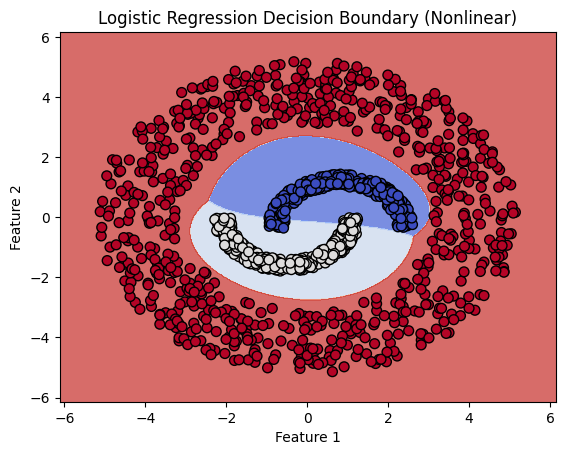

In [13]:
# Train the Logistic Regression model on the transformed features (nonlinear decision boundary)
# Wrap the logistic regression model with OneVsRestClassifier
model = OneVsRestClassifier(LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced', random_state=42))
model.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_poly)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("Precision per class:", precision)
print("Recall per class:", recall)
print("F1 Score per class:", f1)
print("Confusion Matrix:\n", cm)

# Decision Boundary Plot
def plot_decision_boundary(X, y, model, poly, title="Decision Boundary"):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Transform the mesh grid points to the higher-dimensional space using the polynomial transformation
    Z = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    # Use a color map to represent the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plotting decision boundary for Logistic Regression classifier with polynomial features
plot_decision_boundary(X_train, y_train, model, poly, title="Logistic Regression Decision Boundary (Nonlinear)")
